# Market Risk Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_prices = pd.read_csv('D:/DataSets/Market+Risk+Dataset.csv')
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


# Data Summary

In [3]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [4]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [5]:
stock_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra & Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


# Plotting Stocks

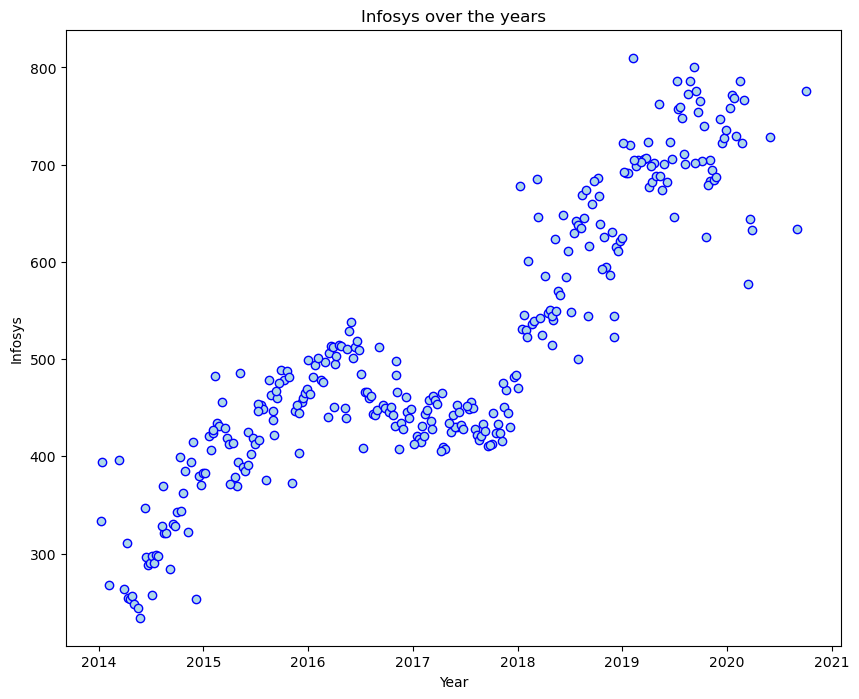

In [6]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

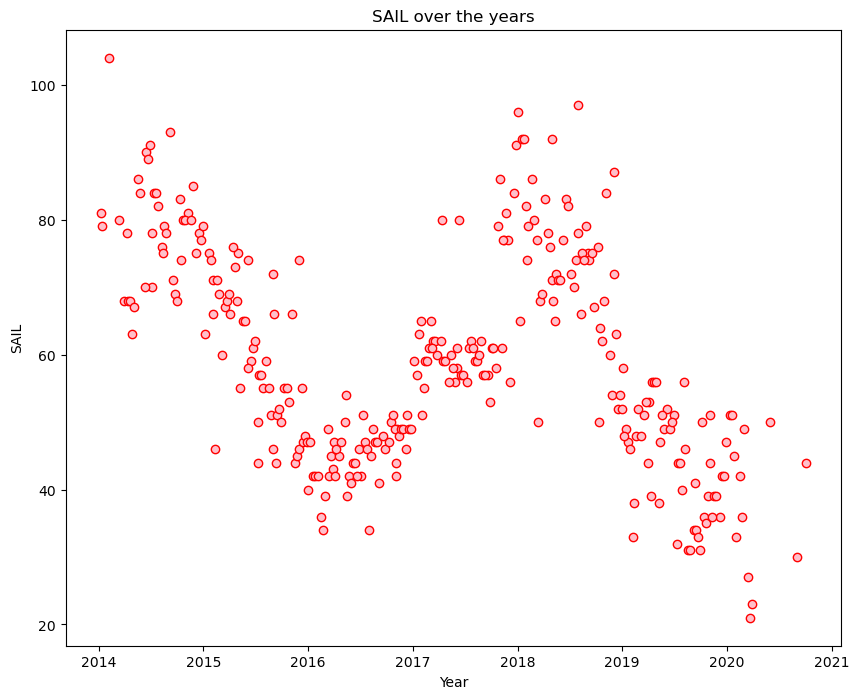

In [7]:
plt.figure(figsize = (10, 8))
plt.scatter(stock_prices['dates'], stock_prices['SAIL'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL over the years')
plt.show()

# Analyzing returns

In [8]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)
stock_returns.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [9]:
stock_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,313.0,0.002794,0.035070,-0.167300,-0.014514,0.004376,0.024553,0.135666
Indian Hotel,313.0,0.000266,0.047131,-0.236389,-0.023530,0.000000,0.027909,0.199333
Mahindra & Mahindra,313.0,-0.001506,0.040169,-0.285343,-0.020884,0.001526,0.019894,0.089407
Axis Bank,313.0,0.001167,0.045828,-0.284757,-0.022473,0.001614,0.028522,0.127461
SAIL,313.0,-0.003463,0.062188,-0.251314,-0.040822,0.000000,0.032790,0.309005
Shree Cement,313.0,0.003681,0.039917,-0.129215,-0.019546,0.003173,0.029873,0.152329
Sun Pharma,313.0,-0.001455,0.045033,-0.179855,-0.020699,0.001530,0.023257,0.166604
Jindal Steel,313.0,-0.004123,0.075108,-0.283768,-0.049700,0.000000,0.037179,0.243978
Idea Vodafone,313.0,-0.010608,0.104315,-0.693147,-0.045120,0.000000,0.024391,0.693147
Jet Airways,313.0,-0.009548,0.097972,-0.458575,-0.052644,-0.005780,0.036368,0.300249


# Stock Means & Standard Deviations of these returns

### Calculating stock means

In [10]:
stock_means = stock_returns.mean(axis = 0)
print("Stock Means:\n\n{}".format(stock_means))

Stock Means:

Infosys                0.002794
Indian Hotel           0.000266
Mahindra & Mahindra   -0.001506
Axis Bank              0.001167
SAIL                  -0.003463
Shree Cement           0.003681
Sun Pharma            -0.001455
Jindal Steel          -0.004123
Idea Vodafone         -0.010608
Jet Airways           -0.009548
dtype: float64


### Calculating stock standard deviation

In [11]:
stock_sd = stock_returns.std(axis = 0)
print("Stock Standard Deviation:\n\n{}".format(stock_sd))

Stock Standard Deviation:

Infosys                0.035070
Indian Hotel           0.047131
Mahindra & Mahindra    0.040169
Axis Bank              0.045828
SAIL                   0.062188
Shree Cement           0.039917
Sun Pharma             0.045033
Jindal Steel           0.075108
Idea Vodafone          0.104315
Jet Airways            0.097972
dtype: float64


In [12]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian Hotel,0.000266,0.047131
Mahindra & Mahindra,-0.001506,0.040169
Axis Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree Cement,0.003681,0.039917
Sun Pharma,-0.001455,0.045033
Jindal Steel,-0.004123,0.075108
Idea Vodafone,-0.010608,0.104315
Jet Airways,-0.009548,0.097972


# Plotting the Stock Means and Standard Deviation

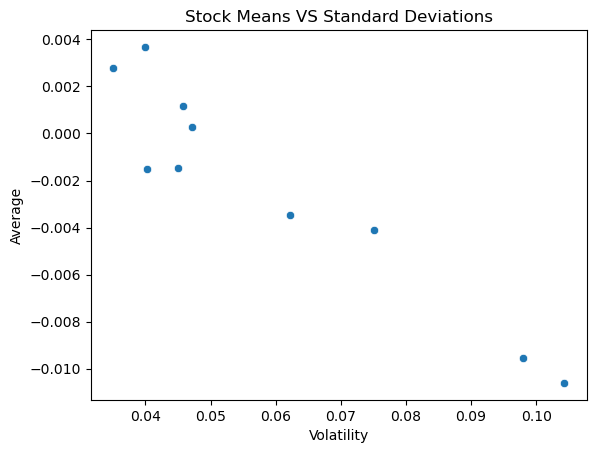

In [13]:
sns.scatterplot(data = df, x = 'Volatility', y = 'Average')
plt.title("Stock Means VS Standard Deviations")
plt.show()

# END